In [1]:
import os
os.chdir('./git/fast-reid')
import sys
sys.path.append('.')

In [4]:
import numpy as np
import torch
import collections
from fastreid.data import datasets
import matplotlib.pyplot as plt
%matplotlib inline

def data_summary(dataset, split='train'):
    print('For split {}'.format(split))
    pid2img = collections.defaultdict(list)
    pid2size = collections.defaultdict(int)
    for imgpath, pid, camid in getattr(dataset, split):
        pid2img[pid].append(imgpath)
        pid2size[pid]+= 1

    num_imgs = list()
    for v in pid2img.values():
        num_imgs.append(len(v))
    num_imgs = np.array(num_imgs)

    print('min: {}, max: {}, median: {}'.format(num_imgs.min(), num_imgs.max(), np.median(num_imgs)))

    plt.figure()
    plt.bar(np.arange(len(num_imgs)), num_imgs, width=0.5)
    plt.show()
    return pid2img

Data summary for dataset Market1501
For split train
min: 2, max: 72, median: 15.0


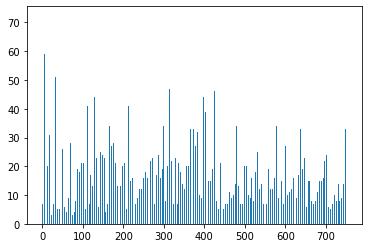

For split query
min: 2, max: 6, median: 5.0


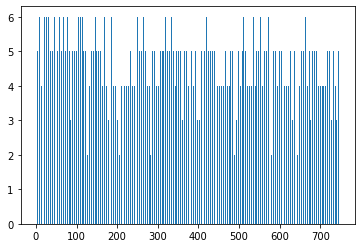

For split gallery
min: 2, max: 2798, median: 16.0


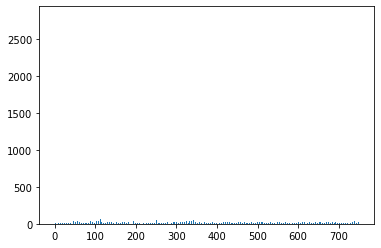

Data summary for dataset DukeMTMC
For split train
min: 6, max: 426, median: 20.0


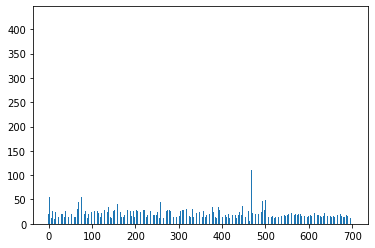

For split query
min: 2, max: 5, median: 3.0


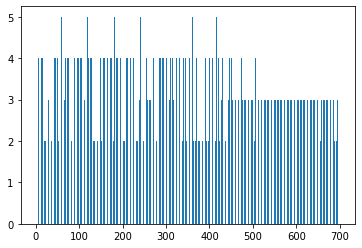

For split gallery
min: 2, max: 389, median: 13.0


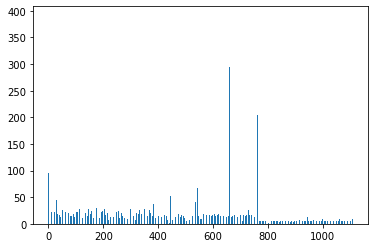

Data summary for dataset MSMT17
For split train
min: 5, max: 371, median: 23.0


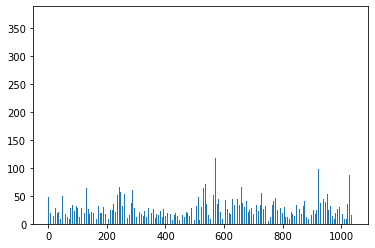

For split query
min: 1, max: 20, median: 4.0


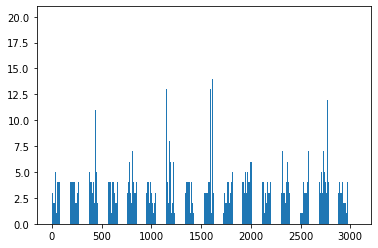

For split gallery
min: 5, max: 173, median: 21.0


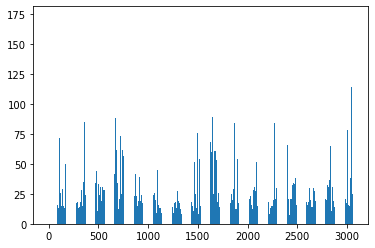

In [5]:
for data_name in ['Market1501', 'DukeMTMC', 'MSMT17']:
    dataset = getattr(datasets, data_name)(root='datasets')
    print(f'Data summary for dataset {data_name}')
    for split in ['train', 'query', 'gallery']:
        _ = data_summary(dataset, split)